# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [3]:
!pip install -q yfinance
!pip install pandas-datareader

In [127]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['VTI']

# Set up End and Start times for data grab
tech_list = ['VTI']

end = datetime.now()
start = datetime(2010, 1, 1)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [VTI]
company_name = ["Vanguard Total Stock Market Index Fund ETF"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-13,259.079987,259.079987,257.559998,258.190002,258.190002,1948400,Vanguard Total Stock Market Index Fund ETF
2024-05-14,258.230011,259.670013,258.079987,259.450012,259.450012,2466800,Vanguard Total Stock Market Index Fund ETF
2024-05-15,260.850006,262.730011,260.440002,262.640015,262.640015,2508700,Vanguard Total Stock Market Index Fund ETF
2024-05-16,262.679993,263.279999,261.859985,261.929993,261.929993,2445000,Vanguard Total Stock Market Index Fund ETF
2024-05-17,262.149994,262.299988,261.239990,262.299988,262.299988,2208700,Vanguard Total Stock Market Index Fund ETF
2024-05-20,262.429993,263.359985,262.209991,262.570007,262.570007,2366100,Vanguard Total Stock Market Index Fund ETF
2024-05-21,262.200012,263.160004,262.130005,263.109985,263.109985,2241900,Vanguard Total Stock Market Index Fund ETF
2024-05-22,262.859985,263.070007,261.130005,262.220001,262.220001,2356600,Vanguard Total Stock Market Index Fund ETF
2024-05-23,263.859985,263.920013,259.429993,259.989990,259.989990,6603000,Vanguard Total Stock Market Index Fund ETF


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [128]:
# Summary Stats
VTI.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3.623000e+03
mean,132.785123,133.471488,131.965186,132.783779,121.299799,2.974340e+06
std,56.556372,56.865715,56.203261,56.550700,59.912916,1.896683e+06
min,52.369999,52.689999,29.760000,52.080002,40.502281,3.519000e+05
25%,86.955002,87.119999,86.430000,86.800003,71.729446,1.833150e+06
50%,120.870003,121.389999,120.330002,120.879997,107.528442,2.568400e+06
75%,176.134995,177.495003,174.950005,176.144997,166.779015,3.508700e+06
max,263.859985,263.920013,262.209991,263.109985,263.109985,2.227240e+07


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [129]:
# General info
VTI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3623 entries, 2010-01-04 to 2024-05-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3623 non-null   float64
 1   High          3623 non-null   float64
 2   Low           3623 non-null   float64
 3   Close         3623 non-null   float64
 4   Adj Close     3623 non-null   float64
 5   Volume        3623 non-null   int64  
 6   company_name  3623 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 226.4+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

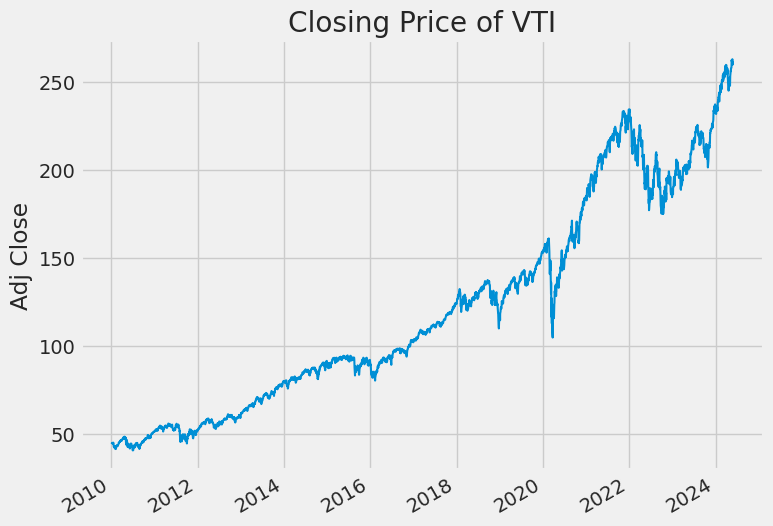

In [130]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth=1.5)  # 設置線條寬度為1.5
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

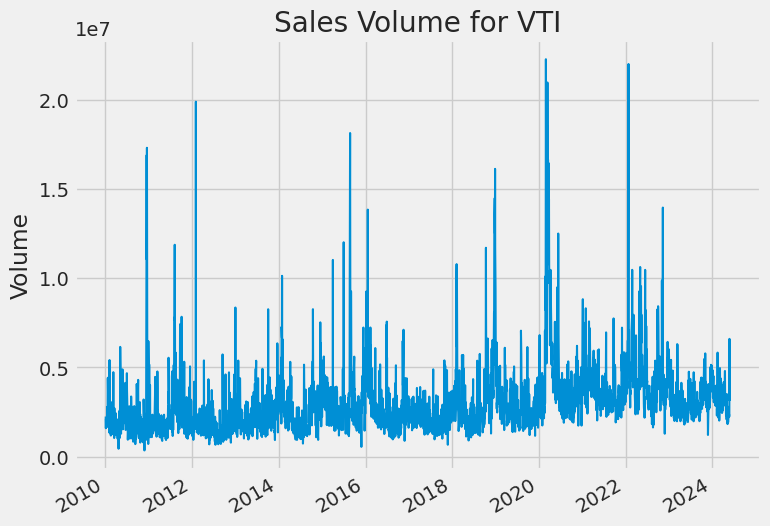

In [131]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(linewidth=1.5)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

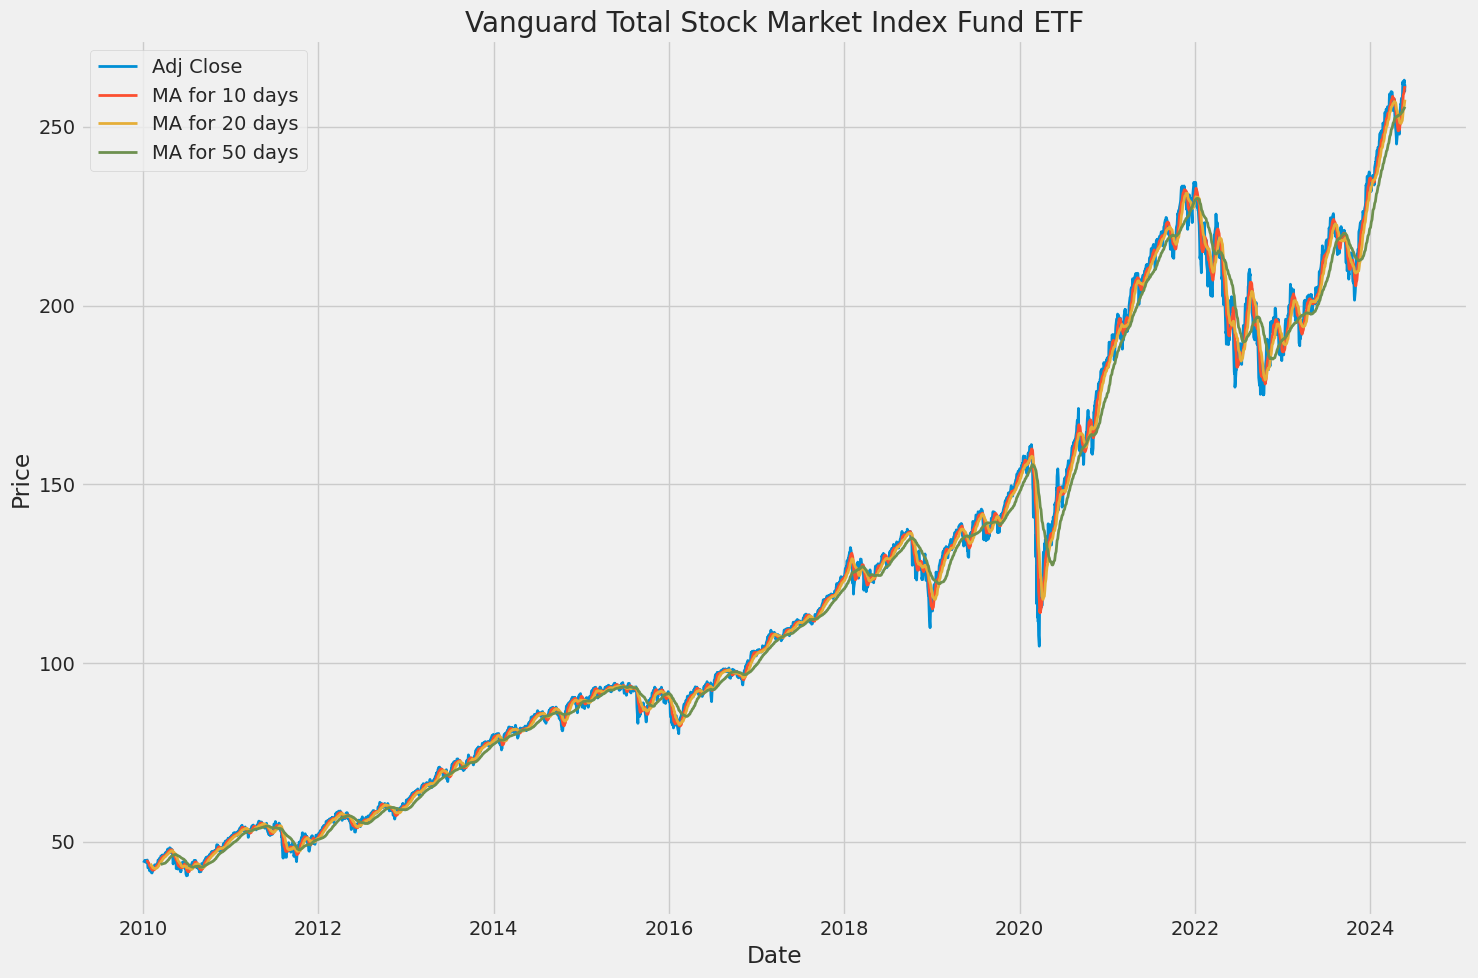

In [132]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    company_list[0][column_name] = company_list[0]['Adj Close'].rolling(ma).mean()

plt.figure(figsize=(15, 10))

# 繪製 Adj Close 和移動平均線圖，並調整線條粗細
plt.plot(company_list[0]['Adj Close'], label='Adj Close', linewidth=2)
plt.plot(company_list[0]['MA for 10 days'], label='MA for 10 days', linewidth=2)
plt.plot(company_list[0]['MA for 20 days'], label='MA for 20 days', linewidth=2)
plt.plot(company_list[0]['MA for 50 days'], label='MA for 50 days', linewidth=2)

plt.title('Vanguard Total Stock Market Index Fund ETF')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

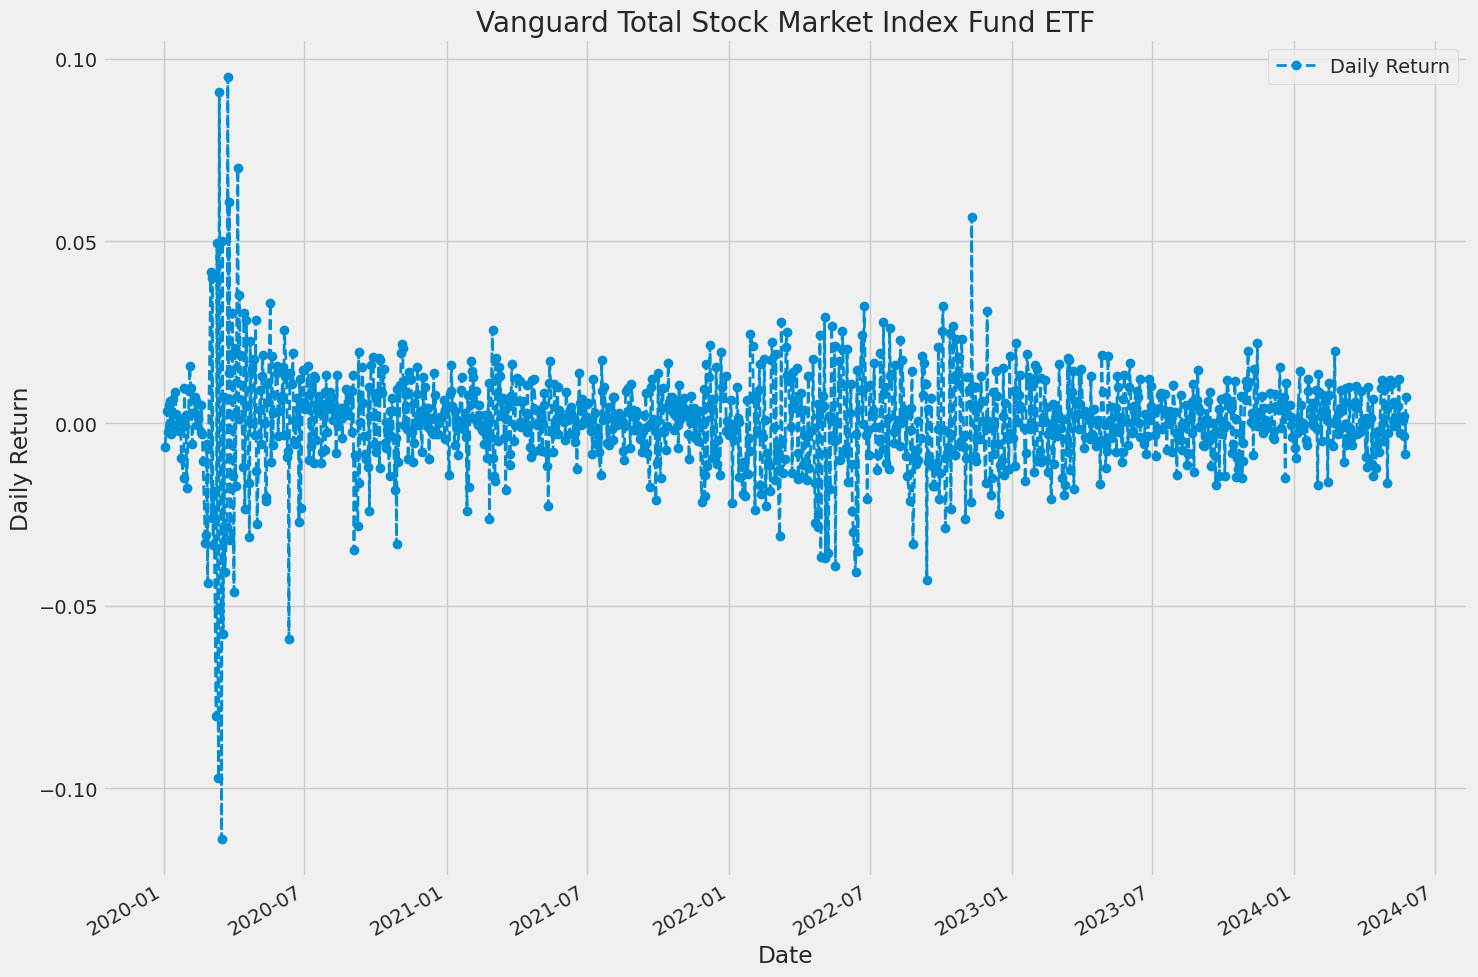

In [93]:
# 使用 pct_change 找到每日的百分比變化
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(15, 10))

# 繪製每日回報百分比圖，並設置線條粗細為2
VTI['Daily Return'].plot(legend=True, linestyle='--', marker='o', linewidth=2)
plt.title('Vanguard Total Stock Market Index Fund ETF')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

plt.tight_layout()
plt.show()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

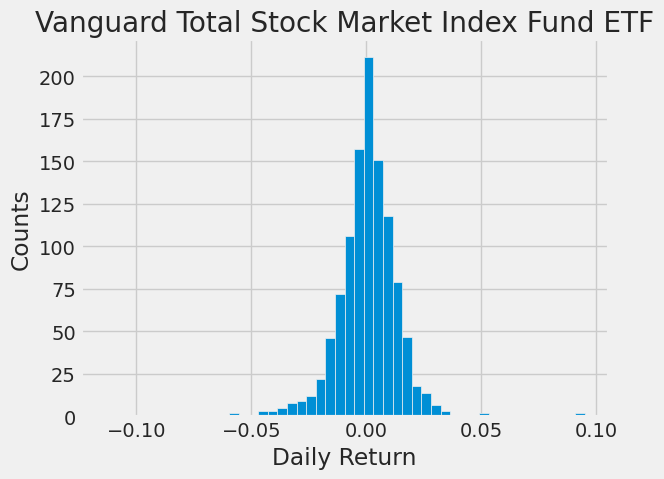

In [94]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 6. Predicting the closing price stock price of APPLE inc:

In [95]:
# Get the stock quote
df = pdr.get_data_yahoo('VTI', start='2010-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,164.679993,164.979996,163.779999,164.979996,154.415054,3291100
2020-01-03,163.289993,164.470001,163.009995,163.929993,153.432358,3625400
2020-01-06,162.919998,164.520004,162.830002,164.490005,153.956497,6813800
2020-01-07,164.270004,164.460007,163.779999,164.100006,153.591446,2498400
2020-01-08,164.199997,165.550003,164.039993,164.910004,154.349533,4244800
...,...,...,...,...,...,...
2024-05-20,262.429993,263.359985,262.209991,262.570007,262.570007,2366100
2024-05-21,262.200012,263.160004,262.130005,263.109985,263.109985,2241900
2024-05-22,262.859985,263.070007,261.130005,262.220001,262.220001,2356600


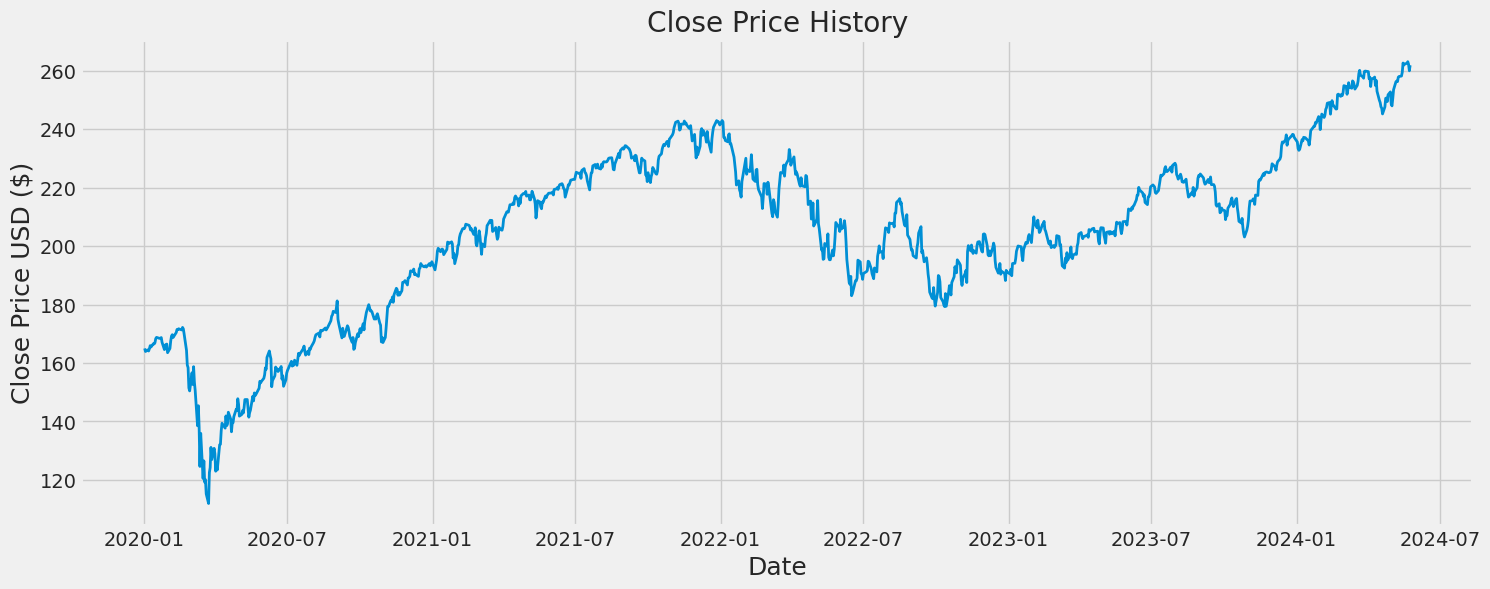

In [96]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [97]:
# Create a new dataframe with only the 'Close column
data = company['Daily Return']
# Convert the dataframe to a numpy array
dataset = data.values
dataset = np.reshape(dataset, (dataset.shape[0], 1))
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

dataset

array([[        nan],
       [-0.00636439],
       [ 0.00341619],
       ...,
       [-0.00338256],
       [-0.00850435],
       [ 0.00723107]])

In [98]:
# For Calculating closing price
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
close = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))


In [99]:
print(close)
print()

[[164.97999573]
 [163.92999268]
 [164.49000549]
 ...
 [262.22000122]
 [259.98999023]
 [261.86999512]]



# Naïve Model
預測結果為前一天的收盤價。

In [100]:
y_train = dataset[1:training_data_len, :]
y_test = dataset[training_data_len:, :]
y_predict = dataset[training_data_len-1:-1, :]

close_train = close[0:training_data_len-1, :]
close_test = close[training_data_len-1:-1, :]
close_predict = close[training_data_len-1:-1,:]

rmse = np.sqrt(np.mean((((y_predict+1) * close_test - (y_test+1) * close_test) ** 2)))
print(rmse)
rmse = np.sqrt(np.mean((((close_predict - (y_test+1) * close_test) ** 2))))
print(rmse)


2.575097919309768
1.8348876046583562


<ipython-input-101-009d1a4579e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = (y_predict+1) * close_test


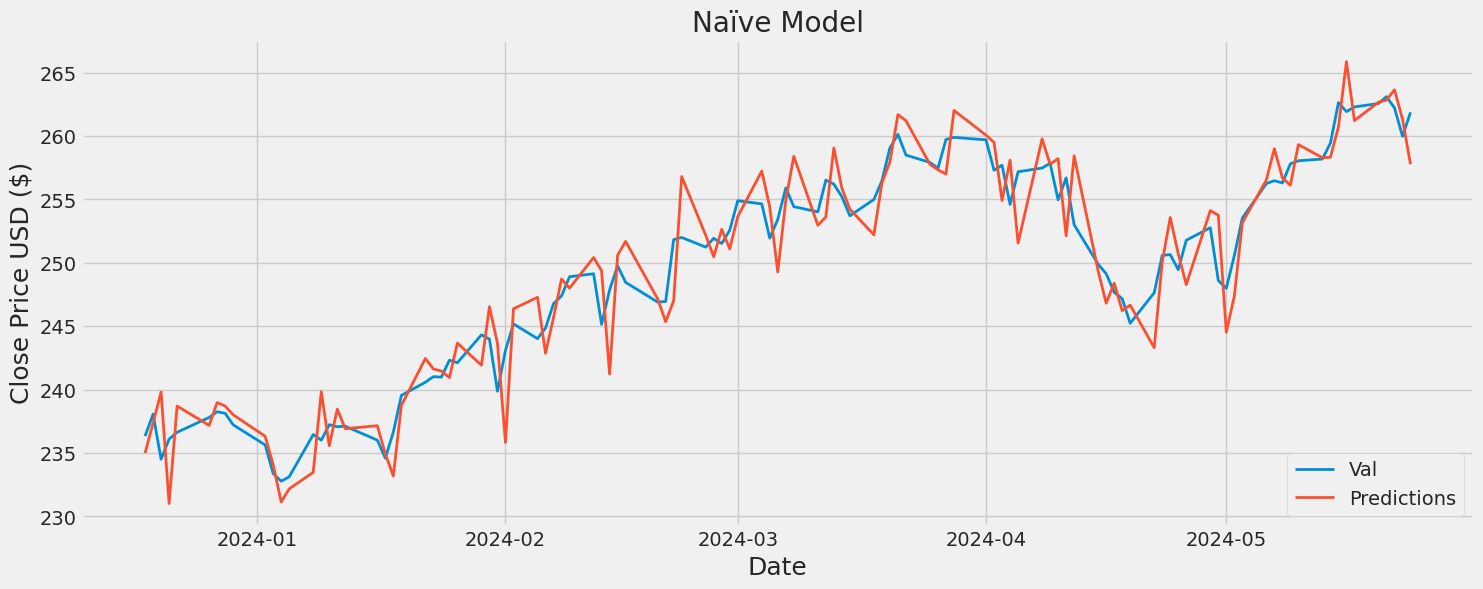

In [101]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = (y_predict+1) * close_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Naïve Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'], linewidth=2)
plt.plot(valid[['Close', 'Predictions']], linewidth=2)
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

#無scaled版本

In [108]:
# Create the training data set
# Create the scaled training data set

#1
# train_data = scaled_data[0:int(training_data_len), :]

#2
factor = 100
dataset = dataset * factor
train_data = dataset[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train_type1 = []
y_train_type1 = []

look_back_day = 30

for i in range(look_back_day+1, len(train_data)):
    x_train_type1.append(train_data[i-look_back_day:i, 0])
    y_train_type1.append(train_data[i, 0])
    if i<= look_back_day+1:
        print(x_train_type1)
        print(y_train_type1)
        print()

# Convert the x_train and y_train to numpy arrays
x_train_type1, y_train_type1 = np.array(x_train_type1), np.array(y_train_type1)

print(x_train_type1.shape)

# Reshape the data
x_train = np.reshape(x_train_type1, (x_train_type1.shape[0], x_train_type1.shape[1], 1))
# x_train.shape

[array([-0.6364389 ,  0.34161948, -0.23711331,  0.49362359,  0.62457899,
       -0.28925299,  0.68292143, -0.05400009,  0.24625516,  0.85671862,
        0.24947108, -0.21327125,  0.05936379,  0.11276492, -0.94849718,
       -1.5021994 ,  0.96611175, -0.06620398,  0.24087983, -1.76619662,
        0.88064134,  1.57614948,  0.98471464,  0.27774748, -0.57166383,
        0.73501182,  0.27652849,  0.62785128, -0.04080211,  0.16334165])]
[-0.23295789780919396]

(966, 30)


#隨機順序

In [109]:
def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]
x_train_type1, y_train_type1 = shuffle(x_train_type1, y_train_type1)

In [117]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, ConvLSTM1D, Dropout
from keras import optimizers

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 1)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

# Compile the model
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
model.fit(x_train_type1, y_train_type1, batch_size=4, epochs=40)

Epoch 1/40
242/242 [==============================] - 7s 8ms/step - loss: 2.2384
Epoch 2/40
242/242 [==============================] - 3s 11ms/step - loss: 2.2398
Epoch 3/40
242/242 [==============================] - 2s 8ms/step - loss: 2.2337
Epoch 4/40
242/242 [==============================] - 2s 9ms/step - loss: 2.2324
Epoch 5/40
242/242 [==============================] - 3s 13ms/step - loss: 2.2263
Epoch 6/40
242/242 [==============================] - 2s 8ms/step - loss: 2.2245
Epoch 7/40
242/242 [==============================] - 2s 8ms/step - loss: 2.2182
Epoch 8/40
242/242 [==============================] - 2s 8ms/step - loss: 2.2260
Epoch 9/40
242/242 [==============================] - 2s 10ms/step - loss: 2.2532
Epoch 10/40
242/242 [==============================] - 3s 11ms/step - loss: 2.2146
Epoch 11/40
242/242 [==============================] - 3s 13ms/step - loss: 2.2182
Epoch 12/40
242/242 [==============================] - 2s 8ms/step - loss: 2.2478
Epoch 13/40
242/242 

In [118]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = dataset[training_data_len - look_back_day: , :]
# Create the data sets x_test and y_test
x_test_type1 = []
close_last_day = close[training_data_len-1:-1, :]
y_test_type1 = close[training_data_len:, :]
for i in range(look_back_day, len(test_data)):
    x_test_type1.append(test_data[i-look_back_day:i, 0])

# Convert the data to a numpy array
x_test_type1 = np.array(x_test_type1)

x_test_type1 = np.reshape(x_test_type1, (x_test_type1.shape[0], x_test_type1.shape[1], 1 ))

# Get the models predicted price values
predicted_percentage = model.predict(x_test_type1)
# predictions = scaler.inverse_transform(predictions)
predictions = (1 + predicted_percentage/factor) * close_last_day
dataset = dataset/float(factor)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test_type1) ** 2)))
rmse

4/4 [==============================] - 1s 5ms/step


1.8160455197757217

<ipython-input-119-b7e02701c2ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


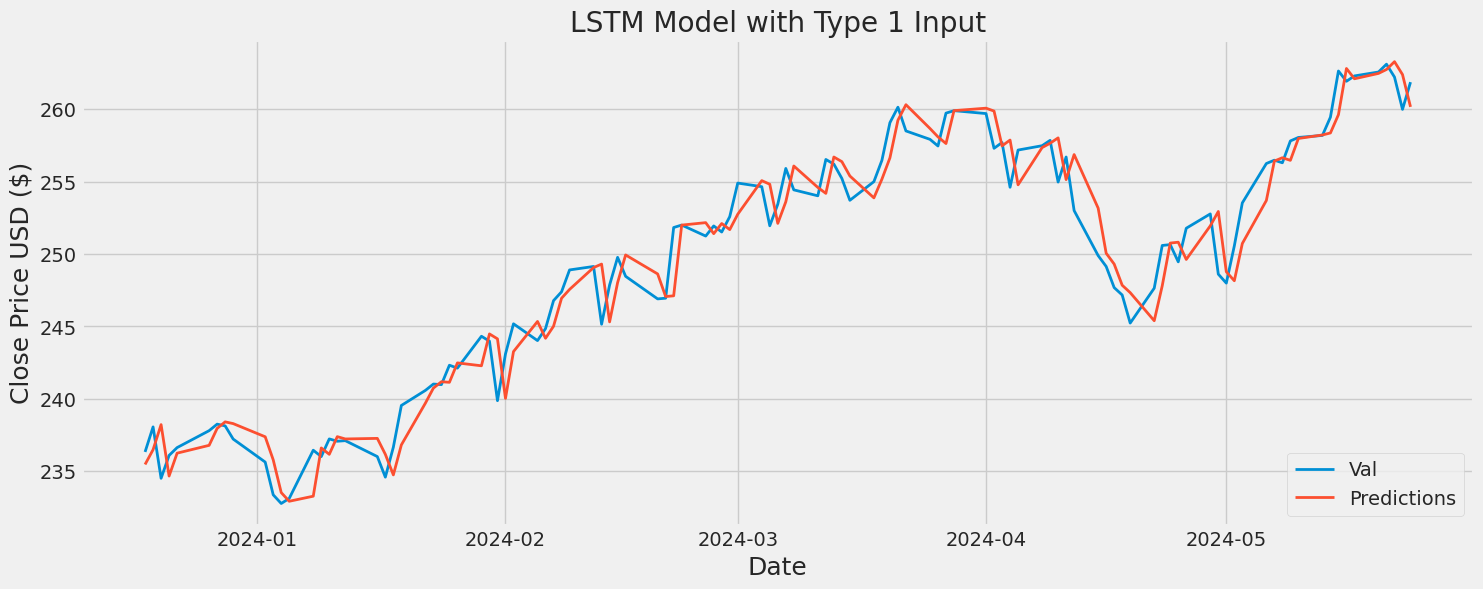

In [119]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model with Type 1 Input')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'], linewidth=2)
plt.plot(valid[['Close', 'Predictions']], linewidth=2)
plt.legend([ 'Val', 'Predictions'], loc='lower right')
plt.show()

#和Naive比較

<ipython-input-126-14267370f2aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
<ipython-input-126-14267370f2aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Naive'] = close_predict


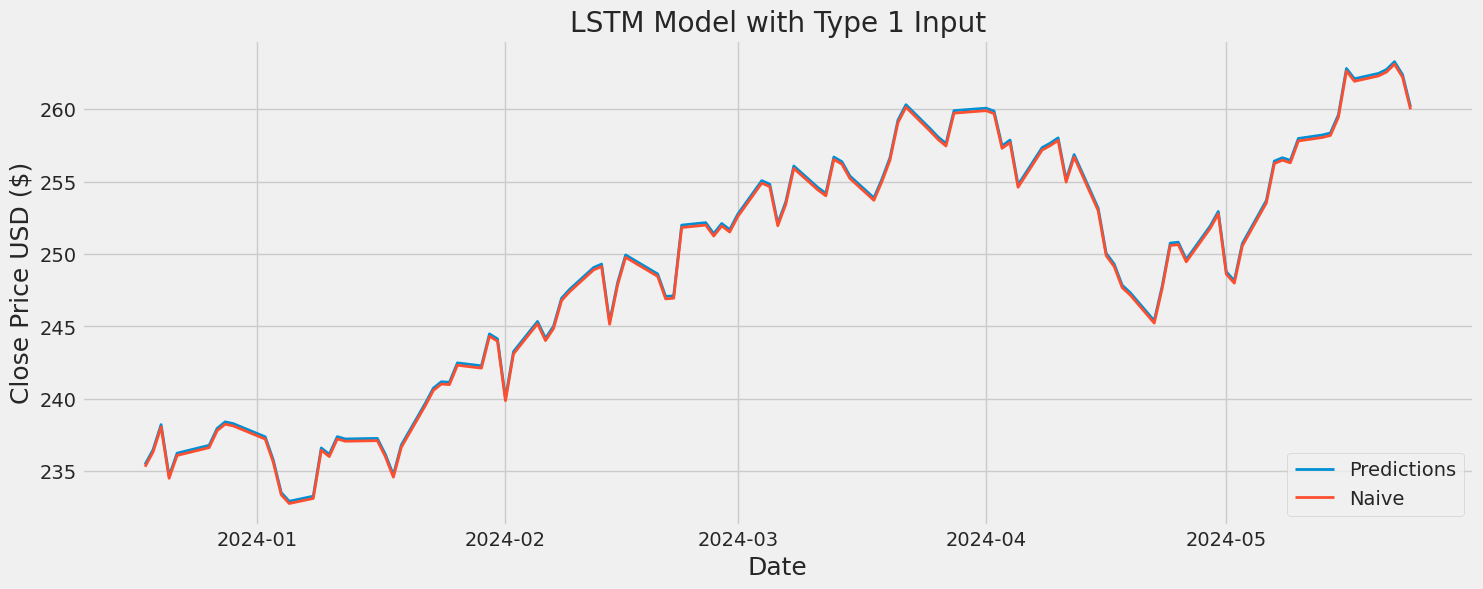

In [126]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Naive'] = close_predict
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model with Type 1 Input')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'], linewidth=2)
plt.plot(valid[['Predictions','Naive']], linewidth=2)
plt.legend(['Predictions','Naive'], loc='lower right')
plt.show()

#偏移指標

In [125]:
print("平均偏移：")
print(np.mean(predictions-y_test_type1))
print("Naive比較")
print(np.mean(predictions-close_predict))
print("Naive偏移")
print(np.mean(close_predict-y_test_type1))

Naive_gap = y_predict-y_test_type1
print("Naive 高/低估數量：", np.count_nonzero(Naive_gap > 0), "/", np.count_nonzero(Naive_gap < 0))

My_model_gap = predictions-y_test_type1
print("模型 高/低估數量：", np.count_nonzero(My_model_gap > 0), "/", np.count_nonzero(My_model_gap < 0))


平均偏移：
-0.07682442499529067
Naive比較
0.1646300982646525
Naive偏移
-0.24145452325994318
Naive 高/低估數量： 0 / 110
模型 高/低估數量： 52 / 58


In [ ]:
# Show the valid and predicted prices
valid

# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)